# Question 1a: %timeit
You may know from your experiences with matlab that you should always prefer vector- or matrix-based operations over for loops, if possible (hence the name **mat**(rix)**lab**(oratory)). The same is true of python -- you should prefer numpy-array-based operations over for loops. This will also be important for tensorflow -- as much as possible, you should avoid using python for loops when writing tensorflow code. To examine the impact of using for loops over numpy-array-based operations, for this question, you will exploit one of jupyter's built-in magic commands, `%timeit`:

In [1]:
import numpy as np
%timeit np.zeros((100,100))  # provide statistics on how long it takes to generate a 100x100 array of 0s

The slowest run took 1305.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.05 µs per loop


As you can see, all you need to do is put `%timeit` before the command that you would normally run and jupyter will run that line multiple times to generate computation timing statistics.

Now, let's compare the computation timing for multiplying two random matrices, each with a dimension of 100x100, using 1) `np.matmul` and 2) multiple embedded for loops. For (2), please write your own function to implement the for loops. Feel free to wrap (2) into a function definition. Verify that (1) and (2) produce the same output. According to `%timeit`, how many times faster is (1) than (2)?

In [65]:
# numpy matmul
random_matrix_1 = np.random.randint(101, size=(100, 100))
random_matrix_2 = np.random.randint(101, size=(100,100))

%timeit random_matrix_1@random_matrix_2

1000 loops, best of 5: 1.02 ms per loop


In [42]:
# manual for loop multiplication
random_matrix_1 = np.random.randint(101, size=(100, 100))
random_matrix_2 = np.random.randint(101, size=(100,100))
#initialize product matrix
prod_matrix = np.zeros((100,100))
# print(range(len(random_matrix_1)))
def matrix_mult(matrix1, matrix2, sum=0):
  for i in range(len(matrix1)):
    # print(random_matrix_1)
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
       prod_matrix[i][j] += matrix1[i][k]*matrix2[k][j]
    # print(sum)
    prod_matrix[i][j]= sum
    sum=0
    return prod_matrix

%timeit matrix_mult(random_matrix_1, random_matrix_2)

100 loops, best of 5: 14.8 ms per loop


Numpy matrix multiplication using randomly generated matrices via the randint function performs ~15x faster per loop than manual matrix multiplication using 3 for loops. 

# Question 1b
There are two main ways of computing convolutions digitally: 1) directly, using the definition of a convolution, and 2) using the convolution theorem that you proved in the written portion of this homework assignment (i.e., using ffts). Which method is more efficient depends on the sizes of the inputs. Let's use `%timeit` to compare the speeds for 1D convolutions using [`scipy.signal.convolve `](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This function has an argument called "method", which can be set to "direct" or "fft", which correspond to (1) and (2) above. Use this function to convolve two random 1D signals of lengths $n=100, 500, 1000,$ and $2000$, and compare the speed of both methods. For which n do(es) method 1 outperform method 2, and vice versa? Can you make any generalizations based on these results about when one method outperforms the other?

In [67]:
from scipy.signal import convolve
import numpy as np
# direct convolution


def direct(v1, v2):
  convolve(v1, v2, method="direct")


n = [100, 500, 1000, 2000]

for i in n:
  vector1 = np.random.randint(1001, size=(i))
  vector2 = np.random.randint(1001, size=(i))
  %timeit direct(vector1, vector2)

The slowest run took 7.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17 µs per loop
1000 loops, best of 5: 257 µs per loop
1000 loops, best of 5: 1e+03 µs per loop
100 loops, best of 5: 3.88 ms per loop


In [66]:
from scipy.signal import convolve
import numpy as np
# fft convolution


def fft(v1, v2):
  convolve(v1, v2, method="fft")


n = [100, 500, 1000, 2000]

for i in n:
  vector1 = np.random.randint(1001, size=(i))
  vector2 = np.random.randint(1001, size=(i))
  %timeit fft(vector1, vector2)

The slowest run took 41.85 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 100 µs per loop
The slowest run took 12.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 127 µs per loop
10000 loops, best of 5: 158 µs per loop
1000 loops, best of 5: 225 µs per loop


For small inputs (n <= 100), the direct convolution method is faster. For all other inputs tested in this example, the fft convolution method is faster. In general, it seems that for inputs with a large number of elements (n > 100), the fft convolution will be more computationally efficient than the direct convolution method.

# Question 2: the convolution theorem
As we investigated in question 1b, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

For this question, to illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. To this end,

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

In [45]:
# get image
!wget --output-document=WOimg.jpg https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2022%2F02%2F02%2Folympics-logo-beijing.jpg

--2022-02-06 20:15:17--  https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2022%2F02%2F02%2Folympics-logo-beijing.jpg
Resolving imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)... 13.227.33.78, 13.227.33.118, 13.227.33.48, ...
Connecting to imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)|13.227.33.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954497 (932K) [image/jpeg]
Saving to: ‘WOimg.jpg’

WOimg.jpg           100%[===================>] 932.13K  --.-KB/s    in 0.01s   

2022-02-06 20:15:17 (93.4 MB/s) - ‘WOimg.jpg’ saved [954497/954497]



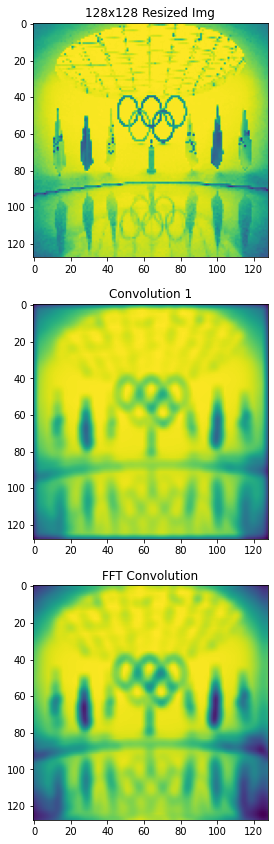

In [57]:
# the following line will cause subsequent plotting commands to display directly in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d

# Load image, resize, and grayscale
img = cv2.imread('WOimg.jpg')
img = cv2.resize(img, (128,128))
img = img.sum(2)

fig = plt.figure(figsize=(25, 25))
columns = 1
rows = 5
fig.add_subplot(rows, columns, 1)
plt.title("128x128 Resized Img")
plt.imshow(img)

# Gaussian Kernel
x, y = np.meshgrid(np.arange(-3,4), np.arange(-3,4))
gausskern = np.exp(-(x**2+y**2)/2/2**2)

# scipy convolution
convolution = convolve2d(img, gausskern, mode="same" )
fig.add_subplot(rows, columns, 2)
plt.title("Convolution 1")
plt.imshow(convolution)

# fft convolution using fft conv theorem
gaussfilter = np.fft.fftshift(np.fft.fft2(np.pad(gausskern, ((60, 61), (60, 61)))))
fft_conv = np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(img)*np.fft.ifftshift(gaussfilter))))
fig.add_subplot(rows, columns, 3)
plt.title("FFT Convolution")
plt.imshow(fft_conv)

plt.show()




# Question 3: data augmentation
One indispensable tool used in deep learning is data augmentation. That is, we can to some extent artificially increase the size of our dataset by randomly altering the current dataset. One common augmenting operation is to do random crops of the original image. For example, researchers designing neural networks for ImageNet, a dataset of natural RGB images, typically resize the images to 256x256x3 and then take a random 224x224x3 crop such that the latter fits entirely in the former. What this means is that the 224x224 crop window must be completely contained within the original 256x256 image.

For this question, take a picture with your phone or find a picture online, load it into jupyter, resize it to 256x256x3 (discard the alpha channel if one is present), and then perform the random 224x224x3 crop. The crops should be uniformly distributed within the bounding 256x256 box and do not need to be rotated. Please display the 256x256x3 image and 5 random crops using `plt.imshow`.

In [4]:
#get image using wget

!wget --output-document=MLimage.jpg https://deepimaging.github.io/assets/logo_new.jpg

--2022-02-06 16:34:52--  https://deepimaging.github.io/assets/logo_new.jpg
Resolving deepimaging.github.io (deepimaging.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to deepimaging.github.io (deepimaging.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729006 (712K) [image/jpeg]
Saving to: ‘MLimage.jpg’

MLimage.jpg         100%[===================>] 711.92K  --.-KB/s    in 0.005s  

2022-02-06 16:34:52 (130 MB/s) - ‘MLimage.jpg’ saved [729006/729006]



original image shape:  (1400, 1400, 3)
resized img shape:  (256, 256, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


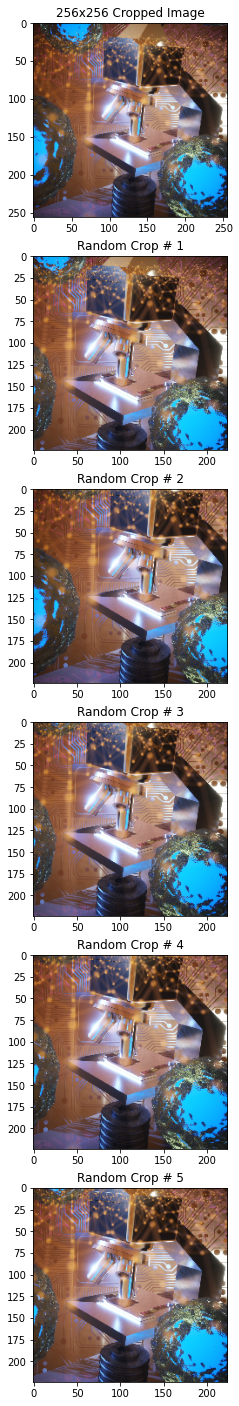

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# load original image
img = cv2.imread('MLimage.jpg')
print("original image shape: ", img.shape)

# resize image
resized_img = cv2.resize(img, (256,256))
print("resized img shape: ", resized_img.shape)

# define subplot for images
fig = plt.figure(figsize=(25, 25))
columns = 1
rows = 6

# add 256 x 256 resized img to subplot
fig.add_subplot(rows, columns, 1)
plt.title("256x256 Cropped Image")
plt.imshow(resized_img)

# set boundary for crop
crop_x, crop_y = 224, 224

# randomly crop images using above boundary and add to subplot
for i in range(2, columns*rows+1):
  random_int_x = np.random.randint(low=0, high=resized_img.shape[0]-crop_x)
  random_int_y = np.random.randint(low=0, high=resized_img.shape[1]-crop_y)

  fig.add_subplot(rows, columns, i)
  plt.title("Random Crop # {}".format(i-1))
  plt.imshow(resized_img[random_int_x:random_int_x+crop_x, random_int_y:random_int_y+crop_y])
  print(resized_img[random_int_x:random_int_x+crop_x, random_int_y:random_int_y+crop_y].shape)

# show all images
plt.show()

# the subplot method of matplot lib crops the images but makes them appear all 
#the same size. Look at the shape output of the for loop in the command line :)




